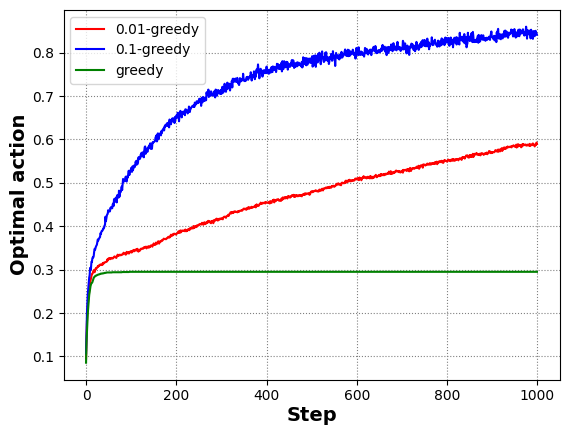

In [2]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
step = 1000
runs = 2000
sigma = 1  # Standard deviation of normal distribution for 10-armed testbed
miu_lst = [0.2, -0.85, 1.55, 0.3, 1.2, -1.5, -0.2, -1.0, 0.9, -0.6]  # List of normally distributed means for 10-armed testbed
best_action_index = miu_lst.index(max(miu_lst))


def action_reward(action):  # 10-armed Gambling machine testbed, input action sequence number, output corresponding reward value
    reward = miu_lst[action]+np.random.normal(0, scale=sigma)
    return reward


def random_index(rate):  # Input a list of probabilities and output the index of the corresponding action according to the probability of the list
    # """Probability function of a random variable"""
    # The parameter rate is a list<int>.
    # Returns the subscript index of the probabilistic action
    start = 0
    index = 0
    randnum = random.randint(1, sum(rate))
    for index, scope in enumerate(rate):
        start += scope
        if randnum <= start:
            break
    return index


def max_index(lst):  # Find the index of the largest value in the list, if there is more than one, output a random index
    index_lst = []
    max_n = max(lst)
    for i in range(len(lst)):
        if lst[i] == max_n:
            index_lst.append(i)
    max_index = random.sample(index_lst, 1)
    max_index = max_index[0]
    return max_index


def greedy(epsilon, step, runs):  # Greedy strategy, input epsilon, step step, average reward list Q, count list N, probability list P,total number of independent tests, output average reward
    action_runs_lst = [[] for k in range(runs)]  # A two-dimensional list that holds the best action judgment variables for all STEPS of all RUNS, where 1 is the correct action and 0 is not the best action.
    action_runs_lst_average = [0 for j in range(step)]  # A one-dimensional list that averages the actions of all the runs in action_runs_lst for the corresponding step.
    for run_times in range(0, runs):
        Q = [0 for i in range(10)]  # 奖励均值Average value of incentives
        N = [0 for j in range(10)]  # 计数列表counting list
        P = [0 for k in range(10)]  # 概率列表probability list
        k = 1

        while k <= step:
            sum_best_action = 0
            for i in range(0, 10):
                P[i] = 1000*epsilon/10
            max_ = max_index(Q)
            P[max_] = 1000 - 1000*epsilon + P[max_]
            # print('The probability list P for the first ', k, 'iteration is ', P)
            action_id = random_index(P)  # Get the index of the action under the probabilistic list P

            if action_id == best_action_index:
                sum_best_action += 1
            action_runs_lst[run_times].append(sum_best_action)

            # print('The selection action for the first ', k, 'The selection action for the second iteration is ', action_id)
            N[action_id] = N[action_id] + 1
            # print('The count list N of the first ', k, 'The count list N of the second iteration is ', N)
            Q[action_id] = Q[action_id] + (1/N[action_id])*(action_reward(action_id) - Q[action_id])
            # print('The list of reward averages Q for the first ', k, 'iteration is ', Q)
            k += 1

    # print(action_runs_lst)
    for i in range(0, step):
        for j in range(0, runs):
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        action_runs_lst_average[i] = action_runs_lst_average[i]/runs
    # print(action_runs_lst_average)
    return action_runs_lst_average


_001_greedy = greedy(0.01, step, runs)
_010_greedy = greedy(0.1, step, runs)

_000_greedy = greedy(0, step, runs)

x = np.arange(step)
plt.plot(x, _001_greedy, color='red')
plt.plot(x, _010_greedy, color='blue')
plt.plot(x, _000_greedy, color='green')
plt.legend(["0.01-greedy", "0.1-greedy", "greedy"])
plt.grid(color='gray', linestyle=':')
plt.xlabel("Step", fontweight='bold', fontsize=14, labelpad=2)
plt.ylabel('Optimal action', fontweight='bold', fontsize=14, labelpad=2)
plt.show()
